In [121]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

def get_uncompiled_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model


model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Only use the 100 batches per epoch (that's 64 * 100 samples)
model.fit(train_dataset, epochs=3, steps_per_epoch=100)

Epoch 1/3
100/100 [==============================] - 0s 764us/step - loss: 1.2804 - sparse_categorical_accuracy: 0.6396
Epoch 2/3
100/100 [==============================] - 0s 714us/step - loss: 0.4064 - sparse_categorical_accuracy: 0.8854
Epoch 3/3
100/100 [==============================] - 0s 726us/step - loss: 0.3550 - sparse_categorical_accuracy: 0.8937


In [124]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
thingy = model.evaluate(train_dataset.batch(64))

782/782 [==============================] - 0s 385us/step - loss: 0.2736 - sparse_categorical_accuracy: 0.9220


In [133]:
predictions = model.predict(train_dataset.batch(20))

In [ ]:
predictions[0]

In [ ]:
train_dataset.cardinality()

In [ ]:
for thing in train_dataset.take(1):
    print(thing)

In [129]:
y_train.shape

(50000,)

In [130]:
predictions.shape

(50000, 10)

In [134]:
predictions2 = [np.argmax(element) for element in predictions]

In [135]:
predictions2

[5,
 0,
 4,
 1,
 9,
 2,
 1,
 3,
 1,
 4,
 3,
 5,
 3,
 6,
 1,
 7,
 2,
 8,
 6,
 9,
 4,
 0,
 9,
 1,
 5,
 2,
 4,
 3,
 7,
 7,
 3,
 8,
 6,
 7,
 0,
 5,
 6,
 0,
 7,
 6,
 1,
 8,
 7,
 9,
 3,
 9,
 8,
 5,
 5,
 3,
 3,
 0,
 7,
 4,
 9,
 8,
 0,
 9,
 4,
 1,
 4,
 4,
 6,
 0,
 4,
 5,
 6,
 1,
 0,
 0,
 1,
 7,
 1,
 6,
 3,
 0,
 2,
 1,
 1,
 7,
 0,
 0,
 2,
 6,
 7,
 8,
 3,
 9,
 0,
 4,
 6,
 7,
 4,
 6,
 8,
 0,
 7,
 8,
 3,
 1,
 5,
 7,
 1,
 7,
 1,
 1,
 6,
 3,
 0,
 2,
 9,
 3,
 1,
 1,
 0,
 4,
 9,
 2,
 0,
 0,
 7,
 0,
 2,
 7,
 1,
 8,
 6,
 4,
 1,
 6,
 3,
 4,
 1,
 9,
 3,
 3,
 3,
 8,
 5,
 4,
 7,
 7,
 4,
 2,
 8,
 5,
 8,
 6,
 2,
 3,
 4,
 6,
 1,
 9,
 9,
 6,
 0,
 3,
 9,
 2,
 8,
 2,
 9,
 4,
 4,
 6,
 4,
 9,
 7,
 0,
 9,
 2,
 7,
 1,
 1,
 5,
 9,
 1,
 0,
 3,
 1,
 3,
 5,
 9,
 1,
 7,
 6,
 2,
 8,
 2,
 2,
 5,
 0,
 7,
 4,
 9,
 7,
 8,
 3,
 2,
 1,
 1,
 8,
 3,
 6,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 1,
 2,
 7,
 3,
 0,
 4,
 6,
 5,
 2,
 6,
 4,
 7,
 8,
 8,
 9,
 9,
 5,
 0,
 7,
 1,
 6,
 2,
 0,
 3,
 5,
 4,
 6,
 5,
 1,
 6,
 3,
 7,
 5,
 8,
 5,
 9,
 1,
 0,


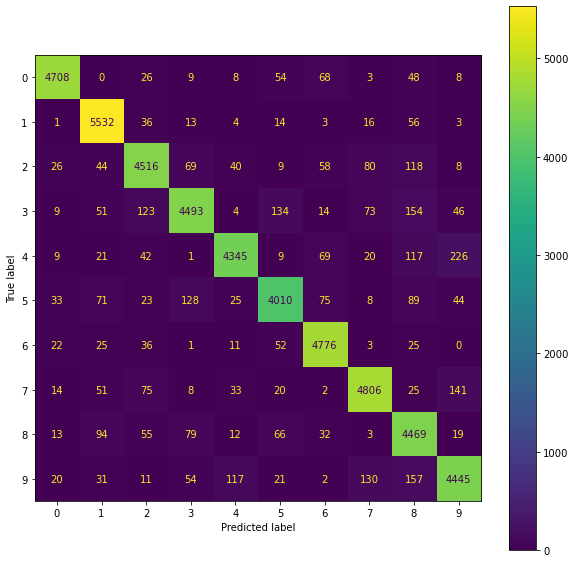

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, predictions2, labels=(0,1,2,3,4,5,6,7,8,9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=(0,1,2,3,4,5,6,7,8,9))

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.savefig("Hello_World.png")

In [146]:
73 * 28 + 89 * 23 * 2047 * 1536

6436163068

In [15]:
1536 * 2047

3144192

In [23]:
total_size = 1536 * 2047 * 2044 * 2
print("Total Size: " + str(total_size))

last_element_begin = (88 * 23 + 2 * 72 * 28 * 2047) * 1536
print("Last Element Begin: " + str(last_element_begin))

last_bscan_last_element = 2 * 1536 * 2047 * 27 + last_element_begin + 1536 * 23
print("Differenz: " + str(total_size - last_bscan_last_element))
print("Should be: 1 bscan vor Ende: 3144192")

Total Size: 12853456896
Last Element Begin: 12680491008
Differenz: 3144192
Should be: 1 bscan vor Ende: 3144192


166.66666666666666

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(elem[0][0,:].numpy().reshape(28, 28), cmap="Greys")

In [ ]:
def print_bag():
    model.evaluate(x_test, y_test)

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
model.fit(x_train, y_train, epochs=3, callbacks=[tensorboard_callback])

In [ ]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):

    def on_train_begin(self, logs=None):
        plt.figure()
        self.loss_history = []

    def on_train_batch_end(self, batch, logs=None):
    #     print(
    #         "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
    #     )
        self.loss_history.append(logs["loss"])
        plt.plot(self.loss_history)

    def on_test_batch_end(self, batch, logs=None):
        print(
            "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
        )

In [26]:
import numpy as np
a = [1, 2, 3, 3, 3]
np.argmax(a)

2

In [ ]:
from IPython.display import clear_output

class CustomCallback(keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.x = []
        self.loss = []
        self.val_loss = []


    def on_test_batch_begin(self, epoch, logs={}):
        pass

    def on_epoch_end(self, epoch, logs={}):
        self.x.append(epoch)
        self.loss.append(logs["loss"])

        clear_output(wait=True)
        tf.print(logs)
        self.val_loss.append(logs["val_loss"])
        plt.figure(figsize=(10, 8))
        ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1)
        ax1.plot(self.x, self.loss, lw=4, label="Training")
        ax1.plot(self.x, self.val_loss, lw=4, label="Validation")
        ax1.legend(fontsize=16)
        ax1.set_xlabel("Epoche", fontsize=16)
        ax1.set_ylabel("Loss", fontsize=16)

        plt.tight_layout()
        plt.show()


custom_callback = CustomCallback()

In [ ]:
model.fit(x_train, y_train, validation_split=0.1 ,epochs=3, callbacks=[custom_callback], steps_per_epoch=100)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [ ]:
for i in a.take(1):
    print(i)

In [ ]:
a = dataset.map(lambda pic, label: {"digits": pic, "label": label, "thingy": 1})

In [ ]:
for i in a.take(1):
    print(a["label"])

In [ ]:
model.fit(a)

In [ ]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [ ]:
background = Image.open("test_image.png")

In [ ]:
background.convert("RGB")

In [ ]:
x_spacing = 23
y_spacing = 28

In [ ]:
import numpy as np

im = np.zeros((225,225,3), dtype=np.uint8)
# Draw grid
im[:, y_spacing:-1:y_spacing] = [255,0,0]    # red horizontal lines
im[x_spacing:-1:x_spacing, :] = [255,0,0]    # blue vertical lines
new_ima = Image.fromarray(im).convert("RGB")

In [ ]:
new_img = Image.blend(background.convert("RGB"), new_ima, 0.5)

In [ ]:
new_img.show()

In [ ]:
new_img = Image.blend(background.convert("RGB"), new_ima, 0.5)
ImageDraw.Draw(new_img).text(
    (0 * y_spacing + 2, 0 * x_spacing),  # Coordinates
    '1',
    (255, 0,0) # Color
)
new_img.save("saved_test.png")

In [ ]:
loss_wert = 0.8
if loss_wert > 0.5:
    color = (255,0,0)

font = ImageFont.load_default()

In [ ]:
font

In [ ]:
font = ImageFont.truetype("/root/pyscripts/arial.ttf", 12)